In [1]:
import os
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sqlalchemy import create_engine

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scripts.functions import Tables
import scripts.config as cfg

In [2]:
table = Tables('../sample_data.csv')
table.split_tables()

In [3]:
table.demographic_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         150000 non-null  int64  
 1   age                 150000 non-null  int64  
 2   monthlyincome       120269 non-null  float64
 3   numberofdependents  146076 non-null  Int64  
dtypes: Int64(1), float64(1), int64(2)
memory usage: 4.7 MB


In [4]:
table.debt_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   customer_id                           150000 non-null  int64  
 1   debtratio                             150000 non-null  float64
 2   revolvingutilizationofunsecuredlines  150000 non-null  float64
 3   numberofopencreditlinesandloans       150000 non-null  int64  
 4   numberrealestateloansorlines          150000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [5]:
table.payment_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   customer_id                           150000 non-null  int64
 1   seriousdlqin2yrs                      150000 non-null  bool 
 2   numberoftime30_59dayspastduenotworse  150000 non-null  int64
 3   numberoftime60_89dayspastduenotworse  150000 non-null  int64
 4   numberoftimes90dayslate               150000 non-null  int64
dtypes: bool(1), int64(4)
memory usage: 4.7 MB


In [6]:
df = pd.merge(pd.merge(table.demographic_table, table.debt_table, on='customer_id'), table.payment_table, on='customer_id')
y = df.pop('seriousdlqin2yrs')
df = pd.concat([df, y], axis=1)
df.seriousdlqin2yrs = df.seriousdlqin2yrs.astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   customer_id                           150000 non-null  int64  
 1   age                                   150000 non-null  int64  
 2   monthlyincome                         120269 non-null  float64
 3   numberofdependents                    146076 non-null  Int64  
 4   debtratio                             150000 non-null  float64
 5   revolvingutilizationofunsecuredlines  150000 non-null  float64
 6   numberofopencreditlinesandloans       150000 non-null  int64  
 7   numberrealestateloansorlines          150000 non-null  int64  
 8   numberoftime30_59dayspastduenotworse  150000 non-null  int64  
 9   numberoftime60_89dayspastduenotworse  150000 non-null  int64  
 10  numberoftimes90dayslate               150000 non-null  int64  
 11  

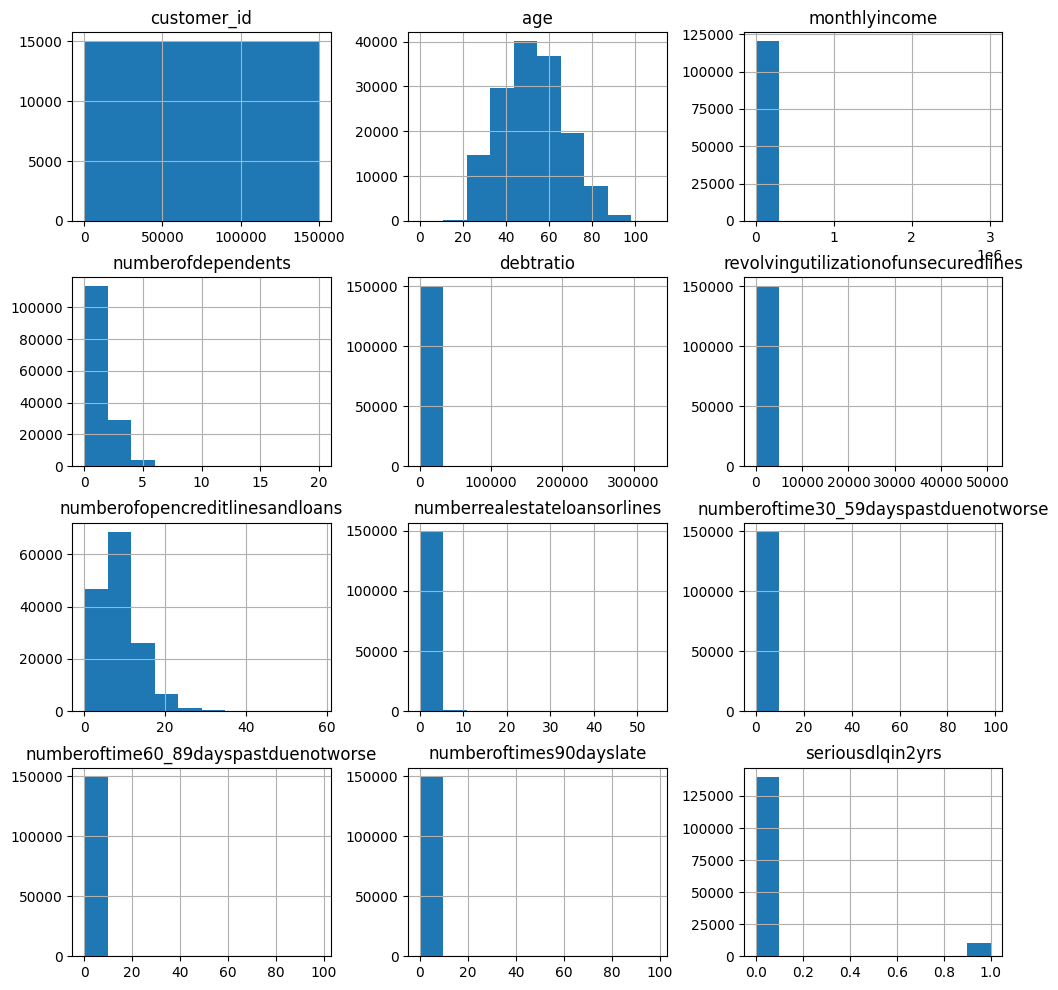

In [8]:
df.hist(figsize=(12,12));

In [9]:
df.describe()

,customer_id,age,monthlyincome,numberofdependents,debtratio,revolvingutilizationofunsecuredlines,numberofopencreditlinesandloans,numberrealestateloansorlines,numberoftime30_59dayspastduenotworse,numberoftime60_89dayspastduenotworse,numberoftimes90dayslate,seriousdlqin2yrs
count,150000.000000,150000.000000,1.202690e+05,146076.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,52.295207,6.670221e+03,0.757222,353.005076,6.048438,8.452760,1.018240,0.421033,0.240387,0.265973,0.066840
std,43301.414527,14.771866,1.438467e+04,1.115086,2037.818523,249.755371,5.145951,1.129771,4.192781,4.155179,4.169304,0.249746
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,41.000000,3.400000e+03,0.000000,0.175074,0.029867,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,52.000000,5.400000e+03,0.000000,0.366508,0.154181,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,112500.250000,63.000000,8.249000e+03,1.000000,0.868254,0.559046,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,150000.000000,109.000000,3.008750e+06,20.000000,329664.000000,50708.000000,58.000000,54.000000,98.000000,98.000000,98.000000,1.000000


In [35]:
np.round(df.corr().seriousdlqin2yrs[1:-1].sort_values(ascending=False), 2)

numberoftime30_59dayspastduenotworse    0.13
numberoftimes90dayslate                 0.12
numberoftime60_89dayspastduenotworse    0.10
numberofdependents                      0.05
revolvingutilizationofunsecuredlines   -0.00
numberrealestateloansorlines           -0.01
debtratio                              -0.01
monthlyincome                          -0.02
numberofopencreditlinesandloans        -0.03
age                                    -0.12
Name: seriousdlqin2yrs, dtype: float64

In [14]:
def plot_boxplot(df: pd.DataFrame, column: str, log_scale: bool=False, quartile: float = None):
    fig, ax = plt.subplots()
    df_ = df.copy()
    df_ = df_[np.isfinite(df[column])].reset_index(drop=True)
    if quartile:
        df_ = df_[df_[column] <= df_[column].quantile(quartile)].reset_index(drop=True)
    a = sns.boxplot(data=df_, x='seriousdlqin2yrs', y=column)
    if log_scale:
        a.set_yscale("log")
        ax.set_title(f'{column} (log scale)')
    else:
        ax.set_title(f'{column}')

def plot_hist(df: pd.DataFrame, column: str, log_scale: bool=False, quartile: float = None):
    fig, ax = plt.subplots()
    df_ = df.copy()
    df_ = df_[np.isfinite(df[column])].reset_index(drop=True)
    if quartile:
        df_ =  df_[df_[column] <= df_[column].quantile(quartile)].reset_index(drop=True)
    if log_scale:
        df_ = df_[df_[column] > 0].reset_index(drop=True)
        sns.histplot(data=df_, x=column, hue='seriousdlqin2yrs', log_scale=True, bins=20)
        ax.set_title(f'{column} (log scale)')
    else:
        sns.histplot(data=df_, x=column, hue='seriousdlqin2yrs', bins=10)
        ax.set_title(f'{column}')

In [15]:
col_reg_scale = [
    'age',
    'numberofdependents',
    'numberofopencreditlinesandloans',
]
col_log_scale = [
    'monthlyincome',
    'debtratio',
    'revolvingutilizationofunsecuredlines',
    'numberrealestateloansorlines',
    'numberoftime30_59dayspastduenotworse',
    'numberoftime60_89dayspastduenotworse',
    'numberoftimes90dayslate',
    'seriousdlqin2yrs'
]

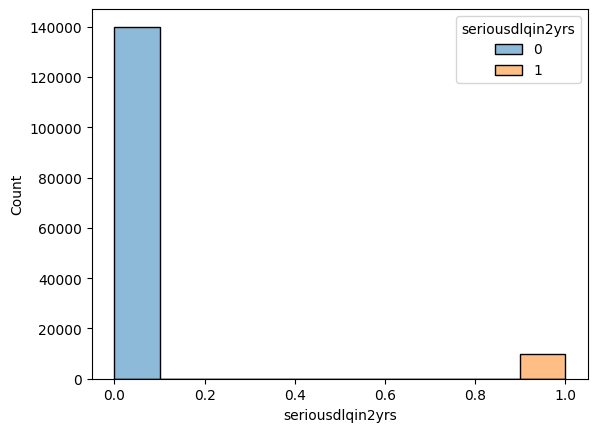

In [22]:
sns.histplot(data=df, x='seriousdlqin2yrs', hue='seriousdlqin2yrs', bins=10);

In [37]:
df['seriousdlqin2yrs'].value_counts()

0    139974
1     10026
Name: seriousdlqin2yrs, dtype: int64

In [38]:
df['seriousdlqin2yrs'].value_counts() / df['seriousdlqin2yrs'].count()

0    0.93316
1    0.06684
Name: seriousdlqin2yrs, dtype: float64

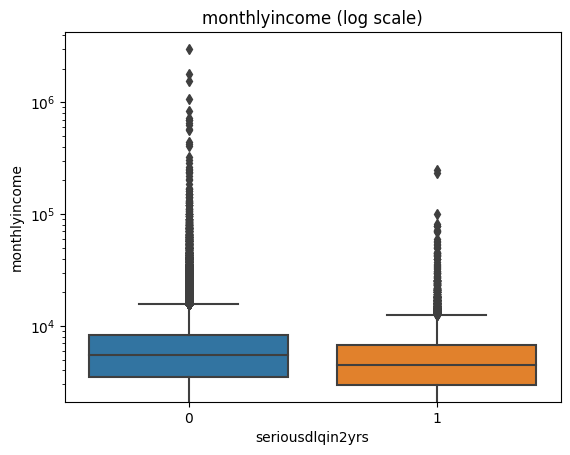

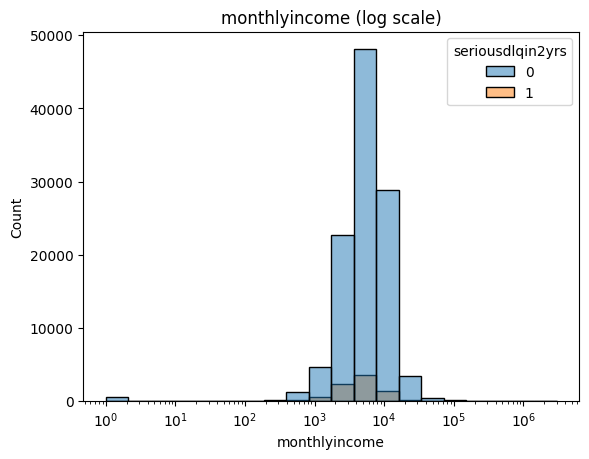

In [16]:
plot_boxplot(df=df, column='monthlyincome', log_scale=True)
plot_hist(df=df, column='monthlyincome', log_scale=True)

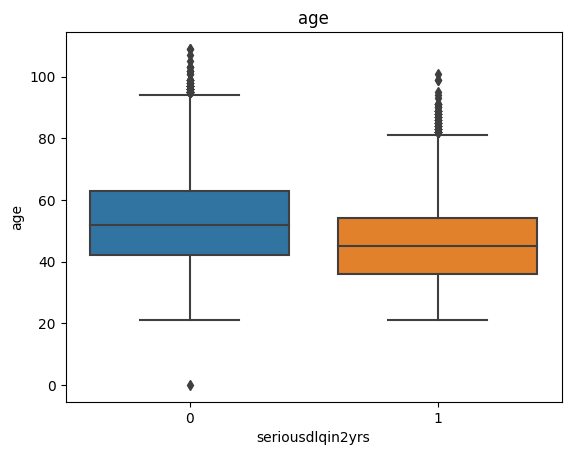

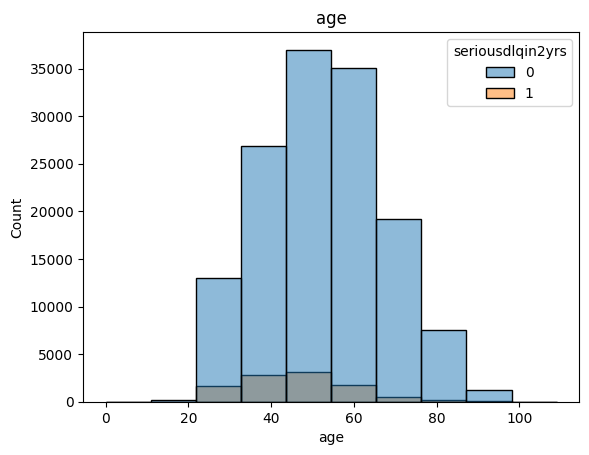

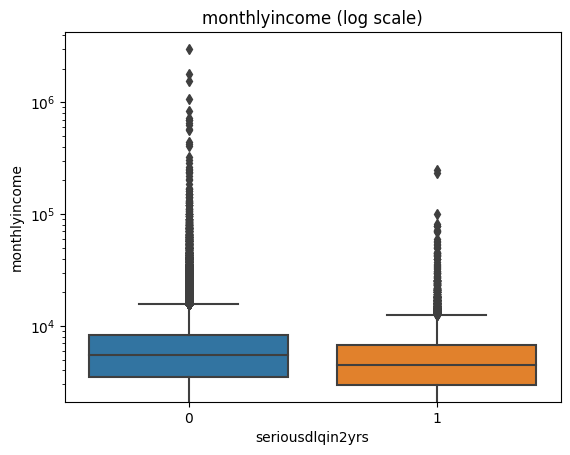

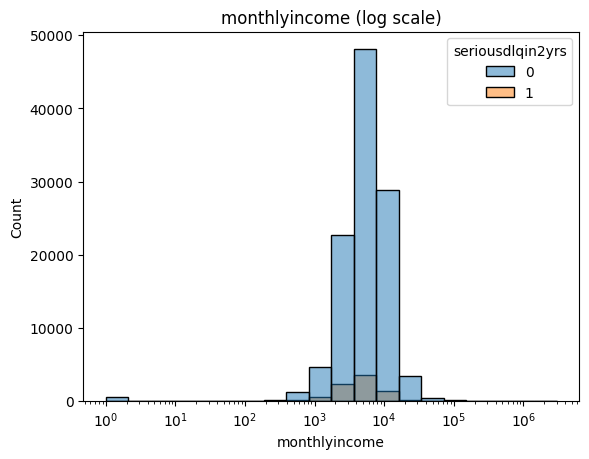

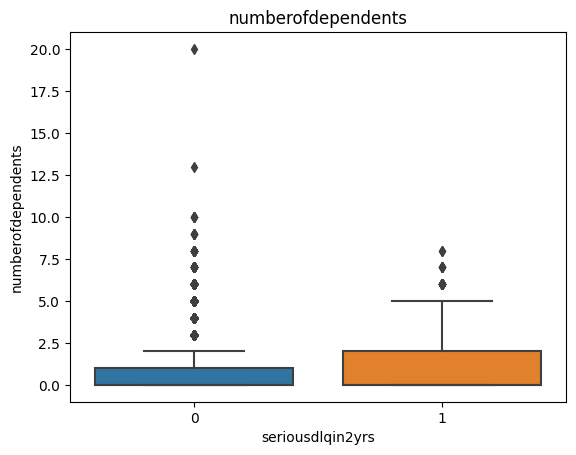

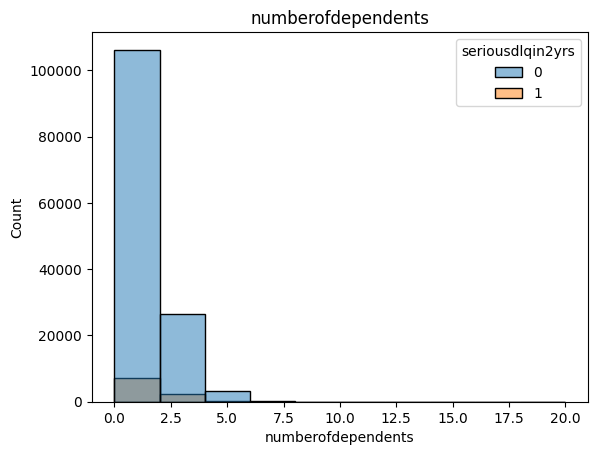

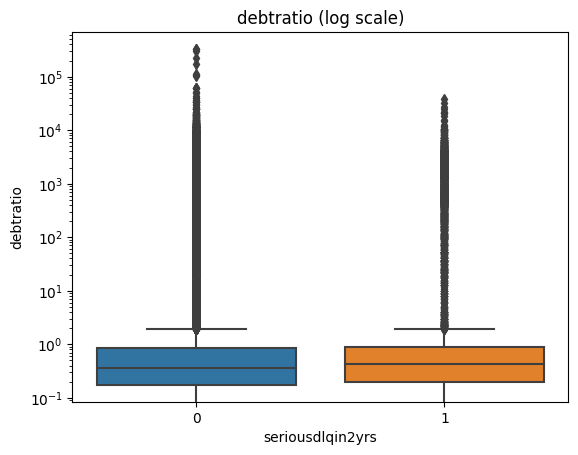

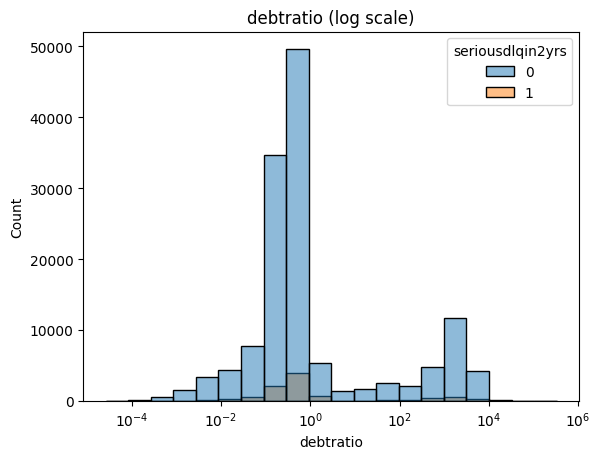

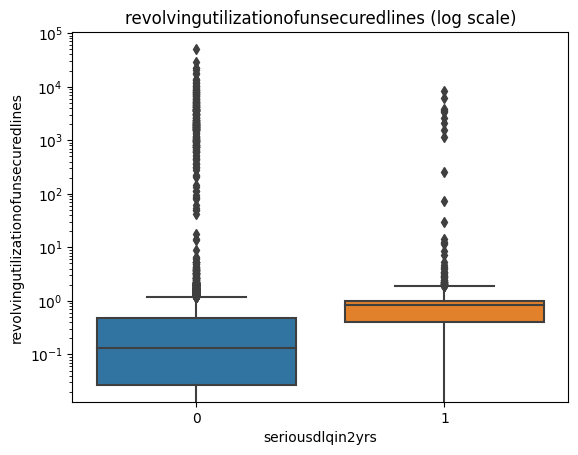

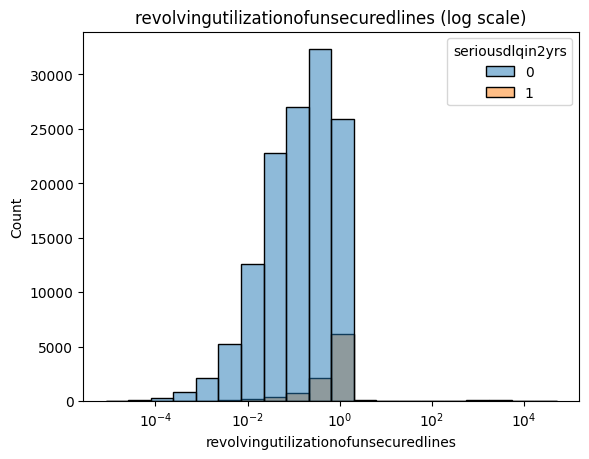

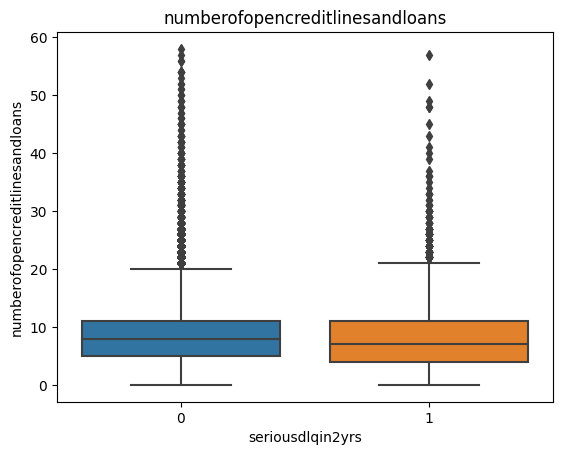

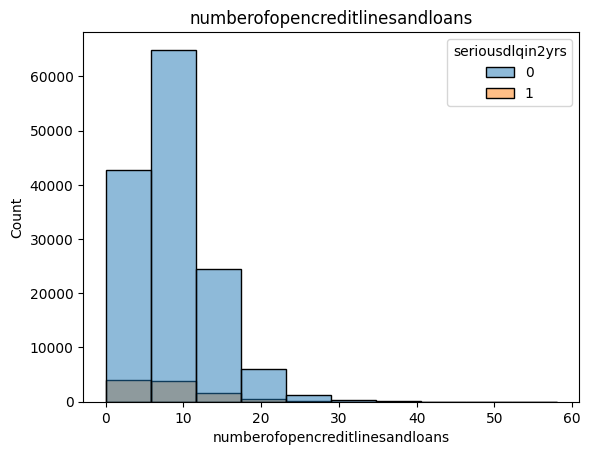

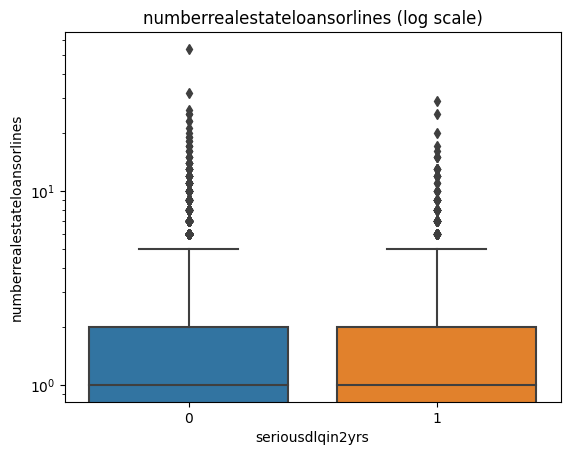

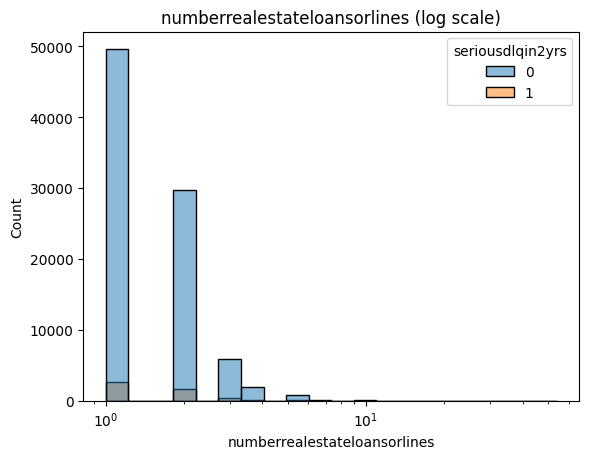

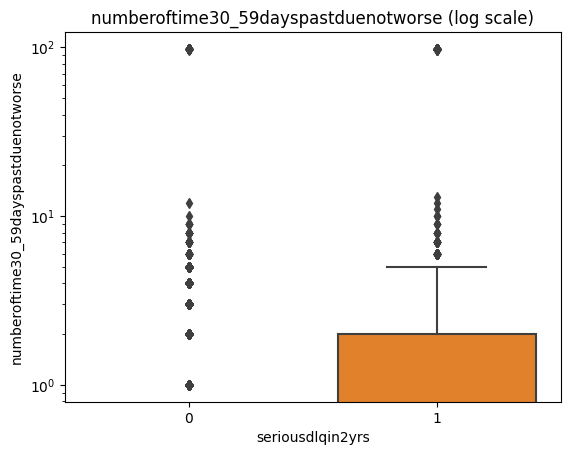

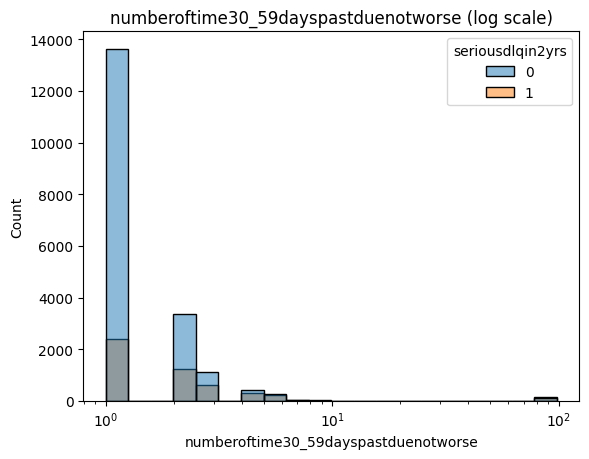

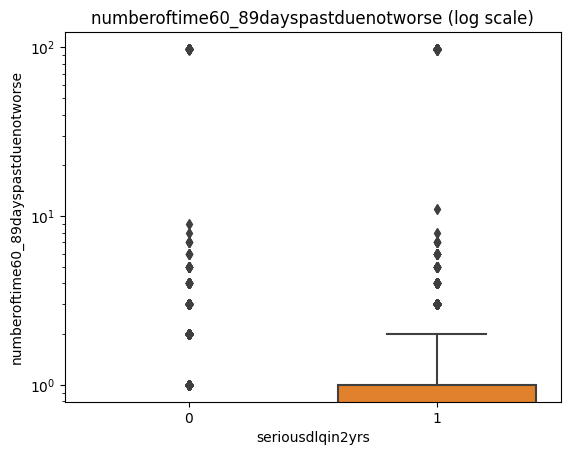

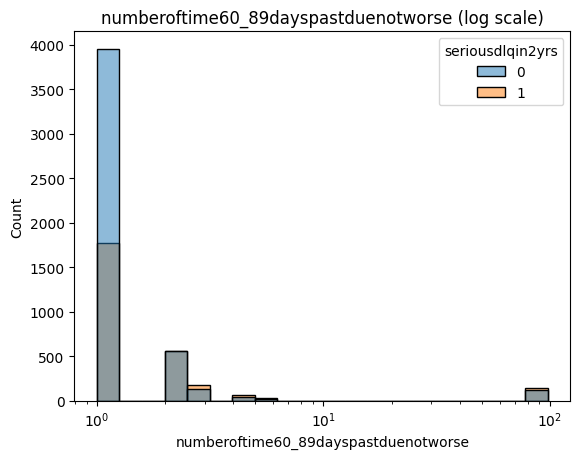

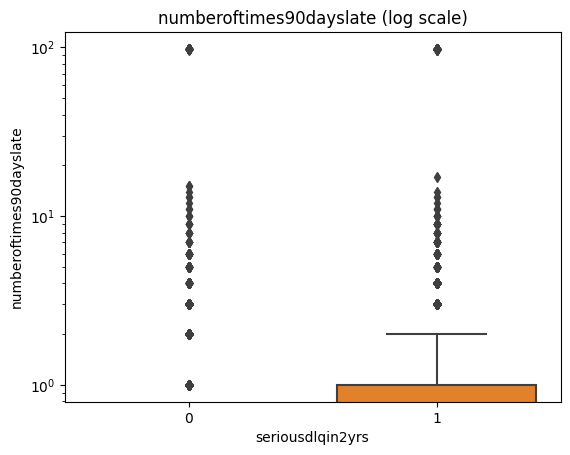

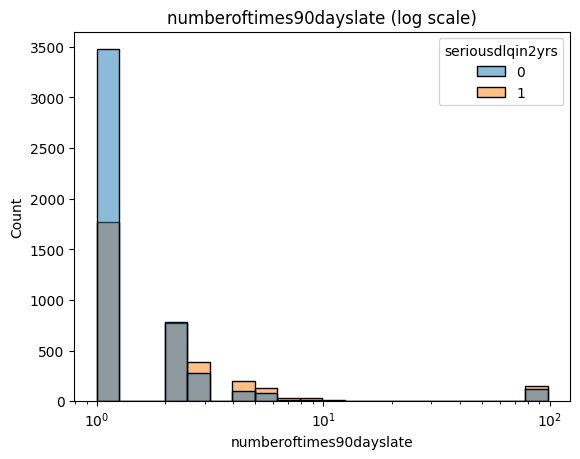

In [17]:
for col in df.columns.to_list()[1:-1]:
    log_scale = False
    if col in col_log_scale:
        log_scale = True
    plot_boxplot(df=df, column=col, log_scale=log_scale)
    plot_hist(df=df, column=col, log_scale=log_scale)

In [135]:
income_q95 = df[df.monthlyincome <= df.monthlyincome.quantile(0.95)]
income_q95.describe()

,customer_id,age,monthlyincome,numberofdependents,debtratio,revolvingutilizationofunsecuredlines,numberofopencreditlinesandloans,numberrealestateloansorlines,numberoftime30_59dayspastduenotworse,numberoftime60_89dayspastduenotworse,numberoftimes90dayslate,seriousdlqin2yrs
count,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000,114255.000000
mean,75018.800683,51.136537,5669.412691,0.829846,27.985187,4.909677,8.609619,1.002031,0.387659,0.194486,0.220209,0.070693
std,43292.769700,14.580213,3164.868351,1.135324,435.429868,199.064437,5.078210,1.064267,3.574650,3.524757,3.542531,0.256312
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37672.000000,40.000000,3300.000000,0.000000,0.145294,0.034722,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74926.000000,50.000000,5146.000000,0.000000,0.302040,0.178906,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,112488.500000,61.000000,7700.000000,1.000000,0.491715,0.586748,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,150000.000000,103.000000,14587.000000,20.000000,61106.500000,29110.000000,58.000000,54.000000,98.000000,98.000000,98.000000,1.000000


In [136]:
income_q95.corr().seriousdlqin2yrs - df.corr().seriousdlqin2yrs

customer_id                             0.001908
age                                     0.013493
monthlyincome                          -0.041987
numberofdependents                      0.004552
debtratio                               0.003951
revolvingutilizationofunsecuredlines    0.000212
numberofopencreditlinesandloans         0.000943
numberrealestateloansorlines            0.000416
numberoftime30_59dayspastduenotworse   -0.001642
numberoftime60_89dayspastduenotworse   -0.007076
numberoftimes90dayslate                -0.004622
seriousdlqin2yrs                        0.000000
Name: seriousdlqin2yrs, dtype: float64

In [36]:
debt_q75 = df[df.debtratio <= df.debtratio.quantile(0.75)].reset_index(drop=True)
debt_q75.describe()

,customer_id,age,monthlyincome,numberofdependents,debtratio,revolvingutilizationofunsecuredlines,numberofopencreditlinesandloans,numberrealestateloansorlines,numberoftime30_59dayspastduenotworse,numberoftime60_89dayspastduenotworse,numberoftimes90dayslate,seriousdlqin2yrs
count,112500.000000,112500.000000,1.108780e+05,112095.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000
mean,75014.816284,51.467564,7.005520e+03,0.846211,0.289751,5.684027,8.531778,0.983902,0.460338,0.274347,0.300329,0.066400
std,43312.947485,14.637570,1.490915e+04,1.146549,0.209009,252.071156,5.140971,1.066821,4.571048,4.537632,4.550384,0.248981
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37630.750000,41.000000,3.691000e+03,0.000000,0.122361,0.032481,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74926.500000,51.000000,5.665500e+03,0.000000,0.268787,0.168470,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,112546.250000,62.000000,8.500000e+03,1.000000,0.425419,0.571672,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,150000.000000,103.000000,3.008750e+06,20.000000,0.868251,50708.000000,57.000000,29.000000,98.000000,98.000000,98.000000,1.000000


In [38]:
debt_q75.corr().seriousdlqin2yrs

customer_id                             0.005145
age                                    -0.109414
monthlyincome                          -0.019872
numberofdependents                      0.046765
debtratio                               0.047994
revolvingutilizationofunsecuredlines   -0.002813
numberofopencreditlinesandloans        -0.043871
numberrealestateloansorlines           -0.030244
numberoftime30_59dayspastduenotworse    0.122796
numberoftime60_89dayspastduenotworse    0.101484
numberoftimes90dayslate                 0.115581
seriousdlqin2yrs                        1.000000
Name: seriousdlqin2yrs, dtype: float64